# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement:

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleveland data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/heart+Disease).

There is also a version of it available on [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci).

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a data dictionary.

Heart Disease Data Dictionary
A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a subject matter expert (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease):

1. **age** - age in years
2. **sex** - (1 = male; 0 = female)
3. **cp** - chest pain type
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    - 3: Asymptomatic: chest pain not showing signs of disease
4. **trestbps** - resting blood pressure (in mm Hg on admission to the hospital)
    - anything above 130-140 is typically cause for concern
5. **chol** - serum cholestoral in mg/dl
    - serum = LDL + HDL + .2 * triglycerides
    - above 200 is cause for concern
6. **fbs** - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - '>126' mg/dL signals diabetes
7. **restecg** - resting electrocardiographic results
    - 0: Nothing to note
    - 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    - 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. **thalach** - maximum heart rate achieved
9. **exang** - exercise induced angina (1 = yes; 0 = no)
10. **oldpeak** - ST depression induced by exercise relative to rest
    - looks at stress of heart during excercise
    - unhealthy heart will stress more
11. **slope** - the slope of the peak exercise ST segment
    - 0: Upsloping: better heart rate with excercise (uncommon)
    - 1: Flatsloping: minimal change (typical healthy heart)
    - 2: Downsloping: signs of unhealthy heart
12. **ca** - number of major vessels (0-3) colored by flourosopy
    - colored vessel means the doctor can see the blood passing through
    - the more blood movement the better (no clots)
13. **thal** - thalium stress result
    - 1,3: normal
    - 6: fixed defect: used to be defect but ok now
    - 7: reversable defect: no proper blood movement when excercising
14. **target** - have disease or not (1=yes, 0=no) (= the predicted attribute)

> **Note:** No personal identifiable information (PPI) can be found in the dataset.

### 4.1. Preparing the tools

We're going to use Pandas, Matplotlib and NumPy for data analysis and manipulation.

We're also going to use tools from Scikit-Learn to create machine learning models for our dataset.

In [1]:
# Import all the tools we need
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

### 4.2. Load Data

In [2]:
df = pd.read_csv("data/heart-disease.csv")
df.shape

(303, 14)

### 4.3. Data Exploration (Exploratory Data Analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset we're working with.

EDA has no real set methodolgy, the following is a short check list we might want to walk through:

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

For now, let's just check out the data we're working with:

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


Let's also check how many of each class do we have in the dataset:

In [5]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

We can also create a bar chart to better visualize this:

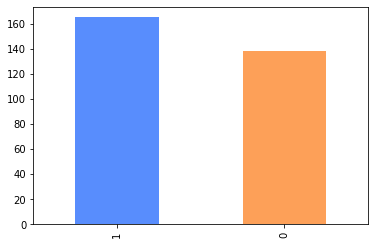

In [6]:
df["target"].value_counts().plot(kind="bar", color=["#588dfd", "#fda058"]);

Let's also use `df.info()`  to show a quick insight to the number of missing values we have and what type of data we're working with:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Another way to get some quick insights on our dataframe is to use `df.describe()`. `describe()` shows a range of different metrics about our numerical columns such as mean, max and standard deviation.

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### 4.3.1. Heart Disease Frequency according to Sex

Let's gain some insight as to whether the patient's sex correlates to having heart disease.

> **Note:** `0` = Female, `1` = Male

In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


Let's create a plot to better visualize the correlation:

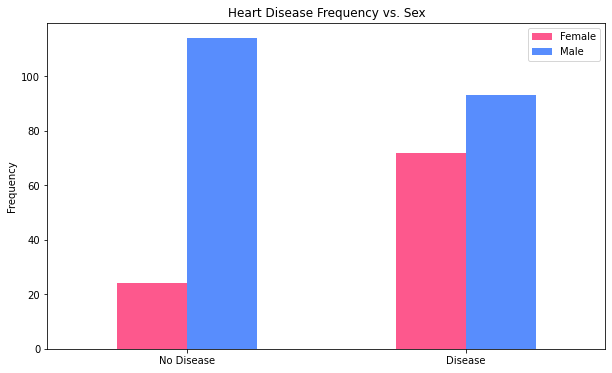

In [11]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["#fd588d", "#588dfd"])

plt.title("Heart Disease Frequency vs. Sex")
plt.xlabel("")
plt.ylabel("Frequency")
plt.legend(["Female", "Male"])
plt.xticks([0, 1], ["No Disease", "Disease"], rotation=0);

#### 4.3.2. Age vs. Max Heart Rate for Heart Disease

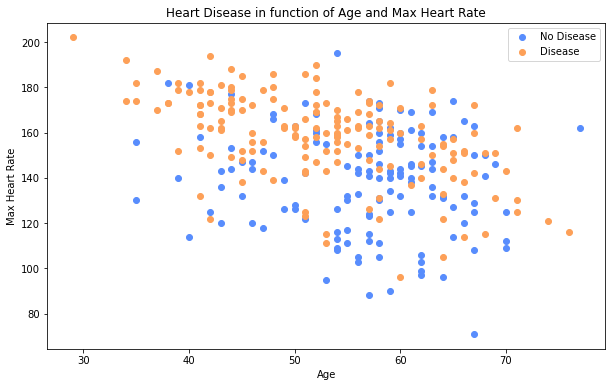

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           c="#588dfd")

ax.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
           c="#fda058")

ax.set(title="Heart Disease in function of Age and Max Heart Rate",
       xlabel="Age",
       ylabel="Max Heart Rate")

ax.legend(["No Disease", "Disease"]);

Checking the distribution of the age column using a histogram:

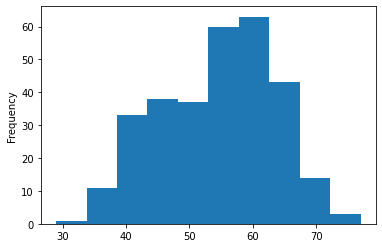

In [13]:
df.age.plot.hist();

#### 4.3.3. Heart Disease Frequency per Chest Pain Type

Referring back to the description for the features:

**cp** - chest pain type
- 0: Typical angina: chest pain related decrease blood supply to the heart
- 1: Atypical angina: chest pain not related to heart
- 2: Non-anginal pain: typically esophageal spasms (non heart related)
- 3: Asymptomatic: chest pain not showing signs of disease

In [14]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


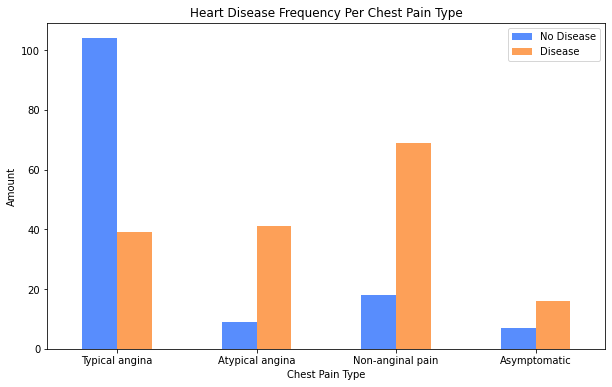

In [15]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["#588dfd", "#fda058"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(ticks=[0, 1, 2, 3],
           labels=["Typical angina", "Atypical angina", "Non-anginal pain", "Asymptomatic"],
           rotation=0);

Looking back at the feature definitions, Atypical angina is supposed to be chest pain not related to heart, but here we can see that our data for that type of chest pain seems to have a higher ratio of participants with heart disease than not.

According to PubMed, it seems [even some medical professionals are confused by the term.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2763472/)

> Today, 23 years later, “atypical chest pain” is still popular in medical circles. Its meaning, however, remains unclear. A few articles have the term in their title, but do not define or discuss it in their text. In other articles, the term refers to noncardiac causes of chest pain.

Although not conclusive, this graph above is a hint at the confusion of defintions being represented in data.

#### 4.3.4. Correlation between independent variables

In [16]:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Visualizing the correlation matrix using a heatmap:

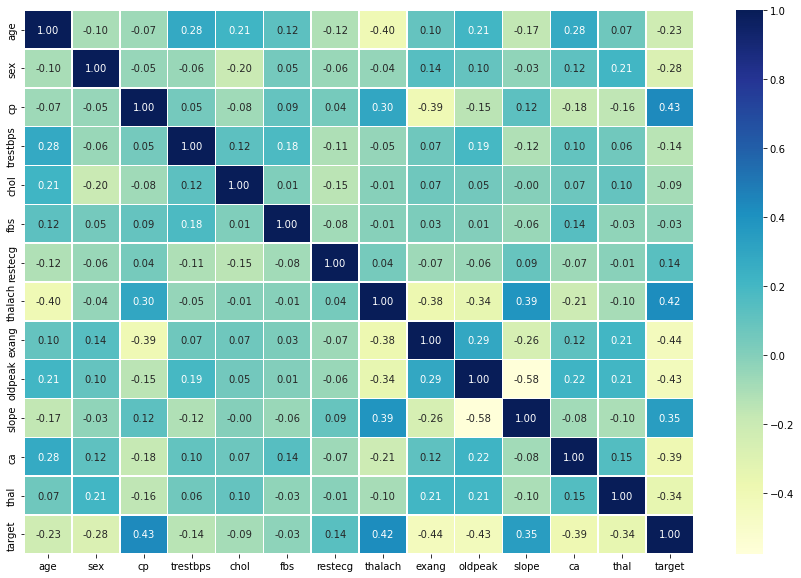

In [17]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

> **Note:** A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).

## 5. Modelling

Let's review the problem statement:

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

Let's also review our evaluation metric:

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

### 5.1. Preparing the data

Let's take another look at our heart disease dataset:

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


We're trying to predict our target variable using all of the other variables.

To do this, we'll split the target variable from the rest:

In [19]:
X = df.drop("target", axis=1)
y = df.target

Let's see our new variables:

In [20]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 5.2. Training and test split

In [22]:
# Random seed for reproducibility
np.random.seed(420)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size=0.2) # percentage of data to use for test set

Let's take a look at our training and test splits:

In [23]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
114,55,1,1,130,262,0,1,155,0,0.0,2,0,2
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [24]:
y_train.head()

124    1
114    1
25     1
184    0
270    0
Name: target, dtype: int64

In [25]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3
80,41,1,2,112,250,0,1,179,0,0.0,2,0,2
233,64,1,0,120,246,0,0,96,1,2.2,0,1,2


In [26]:
y_test.head()

203    0
269    0
198    0
80     1
233    0
Name: target, dtype: int64

Let's also check how many samples are in each split:

In [27]:
len(X_train), len(X_test)

(242, 61)

We can see that we have 242 samples for training, and 61 samples to test our model(s) on.

### 5.3. Model choices

Now we've got our data prepared, we can start to fit models.

Here's an example path we can take using the Scikit-Learn Machine Learning Map:

![Using the Scikit-Learn Machine Learning Map to choose models](img/sklearn_ml_map_cheatsheet_heart_disease_ensemble.png)

We'll be using the following and comparing their results.

1. Logistic Regression - [`LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. K-Nearest Neighbors - [`KNeighborsClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
3. Random Forest - [`RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Since our dataset is relatively small, we can experiment to find algorithm performs best.

All of the algorithms in the Scikit-Learn library use the same functions for training a model (`model.fit(X_train, y_train)`) and for scoring a model (`model.score(X_test, y_test)`). `score()` returns the ratio of correct predictions (1.0 = 100% correct).

Since the algorithms we've chosen implement the same methods for fitting them to the data as well as evaluating them, let's put them in a dictionary and create a which fits and scores them:

In [28]:
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """

    np.random.seed(420)
    model_scores={}

    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [29]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

D:\git-gud\ztm-machine-learning\env\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\git-gud\ztm-machine-learning\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.7540983606557377,
 'Logistic Regression': 0.7377049180327869,
 'Random Forest': 0.7704918032786885}

### 5.4. Model Comparison

Since we've saved our models scores to a dictionary, we can plot them by first converting them to a DataFrame:

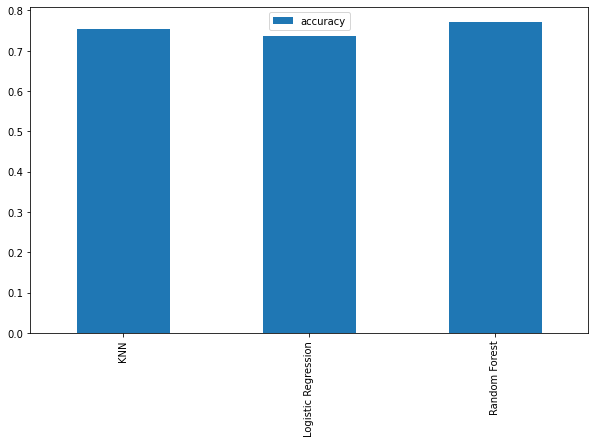

In [30]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(figsize=(10,6));

We can't really see it from the graph but looking at the dictionary, the [`RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model performs best.

Now we've got a baseline model, and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:

- **Hyperparameter tuning** - Each model you use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance.
- **Feature importance** - If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age?
- [**Confusion matrix**](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
- [**Cross-validation**](https://scikit-learn.org/stable/modules/cross_validation.html) - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average.
- [**Precision**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
- [**Recall**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) - Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives.
- [**F1 score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) - Combines precision and recall into one metric. 1 is best, 0 is worst.
- [**Classification report**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) - Scikit-Learn has a built-in function called `classification_report()` which returns some of the main classification metrics such as precision, recall and f1-score.
- [**ROC Curve**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_score.html) - [Receiver Operating Characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is a plot of true positive rate versus false positive rate.
- [**Area Under Curve (AUC)**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) - The area underneath the ROC curve. A perfect model achieves a score of 1.0.

### 5.5. Hyperparameter tuning and cross-validation

We don't have much data, so we'll use cross-validation for our models.

The most common type of cross-validation is k-fold. It involves splitting your data into k-fold's and then testing a model on each. For example, let's say we had 5 folds (k = 5). This what it might look like:

![Normal train and test split versus 5-fold cross-validation](img/sklearn_cross_validation.png)

We'll be using this setup to tune the hyperparameters of some of our models and then evaluate them. We'll also get a few more metrics like **precision**, **recall**, **F1-score** and **ROC** at the same time.

#### 5.5.1. Tune KNeighborsClassifier (K-Nearest Neighbors or KNN) by hand

In [31]:
train_scores = []
test_scores = []

neighbors = range(1, 21)

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train.values, y_train)
    train_scores.append(knn.score(X_train.values, y_train))
    test_scores.append(knn.score(X_test.values, y_test))

Let's look at the training and test scores:

In [32]:
train_scores

[1.0,
 0.78099173553719,
 0.7727272727272727,
 0.7355371900826446,
 0.7479338842975206,
 0.71900826446281,
 0.7148760330578512,
 0.6859504132231405,
 0.6859504132231405,
 0.6694214876033058,
 0.6776859504132231,
 0.6776859504132231,
 0.6735537190082644,
 0.6776859504132231,
 0.6900826446280992,
 0.6942148760330579,
 0.6900826446280992,
 0.6859504132231405,
 0.6859504132231405,
 0.6900826446280992]

In [33]:
test_scores

[0.6721311475409836,
 0.639344262295082,
 0.6885245901639344,
 0.7377049180327869,
 0.7540983606557377,
 0.7868852459016393,
 0.8032786885245902,
 0.8032786885245902,
 0.819672131147541,
 0.819672131147541,
 0.7213114754098361,
 0.7213114754098361,
 0.6885245901639344,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7049180327868853,
 0.7377049180327869,
 0.7213114754098361,
 0.7213114754098361]

These are hard to understand, let's plot them:

Maximum KNN score on the test data: 81.97%


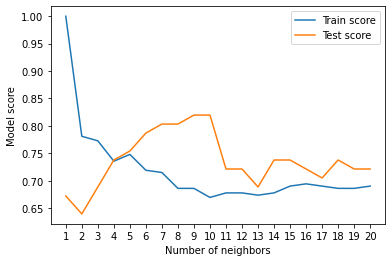

In [34]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Looking at the graph, `n_neighbors = 10` seems best.

#### 5.5.2. Tuning models with [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

We've tuned KNN by hand but let's see how we can [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV) and [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) using `RandomizedSearchCV`.

Instead of us having to manually try different hyperparameters by hand, `RandomizedSearchCV` tries a number of different combinations, evaluates them and saves the best.

Let's create a hyperparameter grid (a dictionary of different hyperparameters) for each and then test them out:

In [35]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [36]:
# Setup random seed
np.random.seed(420)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Let's see what are the best hyperparameters found by `RandomizedSearchCV`:

In [37]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [38]:
rs_log_reg.score(X_test, y_test)

0.8032786885245902

Now we've tuned `LogisticRegression` using `RandomizedSearchCV`, we'll do the same for `RandomForestClassifier`.

In [39]:
# Setup random seed
np.random.seed(420)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [40]:
rs_rf.best_params_

{'n_estimators': 460,
 'min_samples_split': 14,
 'min_samples_leaf': 13,
 'max_depth': None}

In [41]:
rs_rf.score(X_test, y_test)

0.7540983606557377

#### 5.5.3. Tuning a model with [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Since `LogisticRegression` is pulling out in front, we'll try tuning it further with `GridSearchCV`.

The difference between `RandomizedSearchCV` and `GridSearchCV` is where `RandomizedSearchCV` searches over a grid of hyperparameters performing `n_iter` combinations, `GridSearchCV` will test every single possible combination.

In [42]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [43]:
gs_log_reg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [44]:
gs_log_reg.score(X_test, y_test)

0.8032786885245902

In this case, we get the same results as before since our grid only has a maximum of 20 different hyperparameter combinations.

### 5.6. Evaluating a classification model, beyond accuracy

Now we've got a tuned model, let's get some of the metrics we discussed before.

We want:

- ROC curve and AUC score - [`plot_roc_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve)
- Confusion matrix - [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
- Classification report - [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
- Precision - [`precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
- Recall - [`recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
- F1-score - [`f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

To access them, we'll have to use our model to make predictions on the test set:

In [45]:
y_preds = gs_log_reg.predict(X_test)

Let's compare the predictions with the actual values:

In [46]:
y_preds

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [47]:
y_test.values

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

#### 5.6.1. ROC Curve and AUC Scores

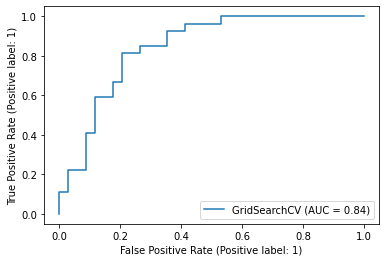

In [48]:
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

This is great, our model does far better than guessing which would be a line going from the bottom left corner to the top right corner, AUC = 0.5. But a perfect model would achieve an AUC score of 1.0, so there's still room for improvement.

#### 5.6.2. Confusion Matrix

In [49]:
print(confusion_matrix(y_test, y_preds))

[[27  7]
 [ 5 22]]


Let's turn this into a heatmap to better understand what's going on:

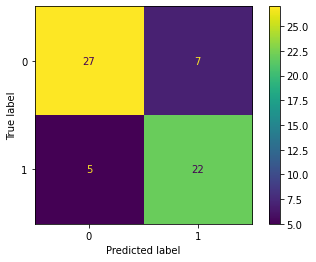

In [50]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds);

We can see the model gets confused (predicts the wrong label) relatively the same across both classes. In essence, there are 5 occasaions where the model predicted 0 when it should've been 1 (false negative) and 7 occasions where the model predicted 1 instead of 0 (false positive).

#### 5.6.3. Classification report

In [51]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82        34
           1       0.76      0.81      0.79        27

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



What's going on here?

Let's get a refresh.

- **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
- **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
- **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
- **Support** - The number of samples each metric was calculated on.
- Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
- **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
- **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

#### 5.6.4. Cross-validation

Currently, our model's scores were all calculated using a single training and test set.

To make them more solid, we can calculate them using cross-validation.

We'll take the best model along with the best hyperparameters and use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) along with various scoring parameter values.

`cross_val_score()` works by taking an estimator (machine learning model) along with data and labels. It then evaluates the machine learning model on the data and labels using cross-validation and a defined scoring parameter.

Let's remind ourselves of the best hyperparameters and then see them in action:

In [52]:
gs_log_reg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [53]:
clf = LogisticRegression(**gs_log_reg.best_params_)

Now we've got an instantiated classifier, let's find some cross-validated metrics:

In [54]:
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.86666667, 0.75      ])

Since there are 5 metrics here, we'll take the average:

In [55]:
cv_acc = np.mean(cv_acc)
cv_acc

0.834808743169399

Now we'll do the same for other classification metrics:

In [56]:
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.8182683982683983

In [57]:
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.9030303030303031

In [58]:
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8572876223964057

Let's visualize the scores that we got:

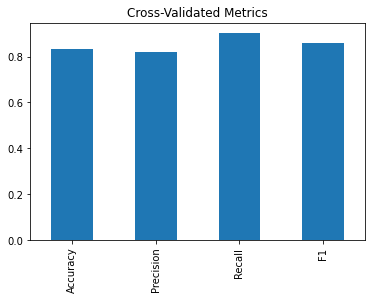

In [59]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

### 5.7. Feature Importance

Feature importance is another way of asking, "which features contributing most to the outcomes of the model?"

Or for our problem, trying to predict heart disease using a patient's medical characterisitcs, which charateristics contribute most to a model predicting whether someone has heart disease or not?

Since we're using `LogisticRegression`, we'll look at one way we can calculate feature importance for it.

To do so, we'll use the `coef_` attribute. Looking at the [Scikit-Learn documentation for `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), the `coef_` attribute is the coefficient of the features in the decision function.

We can access the `coef_` attribute after we've fit an instance of `LogisticRegression`:

In [60]:
clf.fit(X_train, y_train)
clf.coef_

array([[ 0.01460995, -0.58151656,  0.71970894, -0.01542773, -0.00103289,
        -0.0280738 ,  0.20261019,  0.0229906 , -0.46899792, -0.52441022,
         0.21562193, -0.55242935, -0.60954374]])

Looking at this it might not make much sense. But these values are how much each feature contributes to how a model makes a decision on whether patterns in a sample of patients health data leans more towards having heart disease or not.

Even knowing this, in its current form, this `coef_` array still doesn't mean much. So let's combine it with the columns (features) of our dataframe:

In [61]:
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.01460994762853744,
 'sex': -0.5815165619533527,
 'cp': 0.7197089370566384,
 'trestbps': -0.015427728880693839,
 'chol': -0.0010328928474797544,
 'fbs': -0.02807380414889748,
 'restecg': 0.20261019138180958,
 'thalach': 0.02299060239510933,
 'exang': -0.46899791655155665,
 'oldpeak': -0.5244102237774394,
 'slope': 0.2156219304619686,
 'ca': -0.5524293520436421,
 'thal': -0.6095437351159918}

Now let's visualize these feature coefficients:

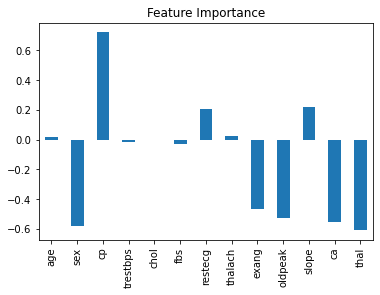

In [62]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

You'll notice some are negative and some are positive.

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values.

For example, the `sex` attribute has a negative value of -0.904, which means as the value for `sex` increases, the `target` value decreases.

We can see this by comparing the sex column to the `target` column:

In [63]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


Looking at this, when `sex` is 0 (female), there are almost 3 times as many (72 vs. 24) people with heart disease (`target = 1`) than without.

And then as sex increases to `1` (male), the ratio goes down to almost 1 to 1 (114 vs. 93) of people who have heart disease and who don't.

This means the model has found a pattern which reflects the data. Looking at these figures and this specific dataset, it seems if the patient is female, they're more likely to have heart disease.

Let's look at a positive correlation:

In [64]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


Reviewing the feature definitions for `slope`:
- 0: Upsloping: better heart rate with excercise (uncommon)
- 1: Flatsloping: minimal change (typical healthy heart)
- 2: Downsloping: signs of unhealthy heart

According to the model, there's a positive correlation of 0.470, not as strong as `sex` and `target` but still more than 0.

This positive correlation means our model is picking up the pattern that as `slope` increases, so does the `target` value.

**What can we do with this information?**

This is something we might want to talk to a subject matter expert about. They may be interested in seeing where machine learning model is finding the most patterns (highest correlation) as well as where it's not (lowest correlation).

Doing this has a few benefits:

- **Finding out more** - If some of the correlations and feature importances are confusing, a subject matter expert may be able to shed some light on the situation and help you figure out more.
- **Redirecting efforts** - If some features offer far more value than others, this may change how you collect data for different problems. See point 3.
- **Less but better** - Similar to above, if some features are offering far more value than others, you could reduce the number of features your model tries to find patterns in as well as improve the ones which offer the most. This could potentially lead to saving on computation, by having a model find patterns across less features, whilst still achieving the same performance levels.

## 6. Experimentation

If you haven't hit your evaluation metric yet, ask yourself:

- Could you collect more data?
- Could you try a better model? Like [`CatBoost`](https://catboost.ai/) or [`XGBoost`](https://xgboost.ai/)?
- Could you improve the current models? (beyond what we've done so far)
- If your model is good enough (you have hit your evaluation metric), how would you export it and share it with others?